# Electric Vehicle Population Prediction

## Introducere în Dataset-ul Populației Vehiculelor Electrice

Acest dataset conține informații detaliate despre vehiculele electrice înregistrate într-o anumită regiune, colectate în primele două trimestre ale anului 2022 (Q1 și Q2). Datele sunt esențiale pentru a înțelege tendințele de adoptare a vehiculelor electrice, caracteristicile acestora și pentru a sprijini inițiativele de promovare a mobilității durabile.

## Importanța Dataset-ului

Vehiculele electrice (EV) reprezintă o componentă crucială în tranziția către un transport mai ecologic și sustenabil. Analiza acestui dataset poate oferi informații valoroase despre:

- **Distribuția geografică a vehiculelor electrice**: Identificarea regiunilor cu cea mai mare adopție a vehiculelor electrice poate ajuta la planificarea infrastructurii de încărcare și la formularea de politici regionale.
- **Preferințele consumatorilor**: Înțelegerea preferințelor în funcție de marcă și model poate ghida producătorii și dealerii în strategii de marketing și producție.
- **Evoluția în timp a adopției vehiculelor electrice**: Monitorizarea creșterii numărului de vehicule electrice poate indica succesul inițiativelor de promovare și poate evidenția necesitatea unor măsuri suplimentare.
- **Impactul prețului și autonomiei**: Analiza relației dintre prețul de bază, autonomia vehiculului și popularitatea acestuia poate oferi perspective asupra factorilor care influențează decizia de cumpărare.

## Structura Dataset-ului

Dataset-ul include următoarele coloane:

- **VIN (Vehicle Identification Number)**: Un identificator unic pentru fiecare vehicul.
- **Make**: Marca vehiculului (de exemplu, Tesla, Nissan).
- **Model**: Modelul vehiculului (de exemplu, Model S, Leaf).
- **Year**: Anul de fabricație al vehiculului.
- **Electric Vehicle Type**: Tipul vehiculului electric (de exemplu, BEV - Battery Electric Vehicle, PHEV - Plug-in Hybrid Electric Vehicle).
- **Base MSRP**: Prețul de bază al vehiculului.
- **Legislative District**: Districtul legislativ în care este înregistrat vehiculul.
- **Electric Range**: Autonomia electrică a vehiculului (în mile).
- **City**: Orașul în care este înregistrat vehiculul.
- **State**: Statul în care este înregistrat vehiculul.
- **Postal Code**: Codul poștal al locației de înregistrare.

## Scopul Analizei și Predicțiilor Ulterioare

Analiza acestui dataset poate servi drept bază pentru diverse predicții și modele predictive, cum ar fi:

- **Predicția adopției viitoare a vehiculelor electrice**: Utilizând modele de învățare automată, putem estima creșterea numărului de vehicule electrice în viitor.
- **Identificarea factorilor determinanți ai adopției**: Analiza factorilor care influențează decizia de cumpărare poate ajuta la dezvoltarea de strategii pentru a încuraja adopția vehiculelor electrice.
- **Planificarea infrastructurii de încărcare**: Predicțiile privind distribuția geografică a vehiculelor electrice pot ghida investițiile în infrastructura de încărcare.


### Importarea bibliotecilor necesare
Importăm bibliotecile necesare, inclusiv pandas, numpy și matplotlib.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


import matplotlib.pyplot as plt
import seaborn as sns

 Importăm dataset-ul din fișierul CSV.

In [3]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
print(df.head())

   VIN (1-10)    County      City State  Postal Code  Model Year     Make  \
0  KM8K33AGXL      King   Seattle    WA      98103.0        2020  HYUNDAI   
1  1C4RJYB61N      King   Bothell    WA      98011.0        2022     JEEP   
2  1C4RJYD61P    Yakima    Yakima    WA      98908.0        2023     JEEP   
3  5YJ3E1EA7J      King  Kirkland    WA      98034.0        2018    TESLA   
4  WBY7Z8C5XJ  Thurston   Olympia    WA      98501.0        2018      BMW   

            Model                   Electric Vehicle Type  \
0            KONA          Battery Electric Vehicle (BEV)   
1  GRAND CHEROKEE  Plug-in Hybrid Electric Vehicle (PHEV)   
2  GRAND CHEROKEE  Plug-in Hybrid Electric Vehicle (PHEV)   
3         MODEL 3          Battery Electric Vehicle (BEV)   
4              I3  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             258   
1             Not eligible d

### Descrierea dataset-ului
Descriem dataset-ul pentru a înțelege mai bine datele.

In [4]:
pd.set_option('display.max_columns', None)
print(df.describe(include='all'))

        VIN (1-10)  County     City   State    Postal Code     Model Year  \
count       150482  150479   150479  150482  150479.000000  150482.000000   
unique        9529     183      683      41            NaN            NaN   
top     7SAYGDEE7P    King  Seattle      WA            NaN            NaN   
freq           807   79075    25675  150141            NaN            NaN   
mean           NaN     NaN      NaN     NaN   98168.344154    2020.005436   
std            NaN     NaN      NaN     NaN    2473.612184       3.015209   
min            NaN     NaN      NaN     NaN    1730.000000    1997.000000   
25%            NaN     NaN      NaN     NaN   98052.000000    2018.000000   
50%            NaN     NaN      NaN     NaN   98122.000000    2021.000000   
75%            NaN     NaN      NaN     NaN   98370.000000    2023.000000   
max            NaN     NaN      NaN     NaN   99577.000000    2024.000000   

          Make    Model           Electric Vehicle Type  \
count   150482  

### Verificarea valorilor lipsă
Verificăm dacă există valori lipsă în dataset.


In [5]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({"Missing Count": missing_values, "Percentage (%)": missing_percentage})
missing_data = missing_data[missing_data["Missing Count"] > 0]

missing_data

,Missing Count,Percentage (%)
County,3,0.001994
City,3,0.001994
Postal Code,3,0.001994
Legislative District,341,0.226605
Vehicle Location,7,0.004652
Electric Utility,3,0.001994
2020 Census Tract,3,0.001994


În urma analizei inițiale a dataset-ului pentru identificarea valorilor lipsă, s-a constatat un număr semnificativ de valori lipsă în coloana `Legislative District`, precum și un număr mai mic de valori lipsă în coloanele `Country`, `City`, `Postal Code`, `Vehicle Location`, `Electric Utility` și `2020 Census Tract`. Aceste valori lipsă vor fi completate utilizând algoritmi de învățare automată, bazându-se pe datele disponibile din coloanele respective.

### Eliminarea valorilor lipsă
Eliminăm rândurile care conțin valori lipsă.

In [6]:
df_cleaned = df.dropna()

### Verificarea și eliminarea duplicatelor
Verificăm și eliminăm rândurile duplicate.

In [7]:
print("\nNumărul de duplicate în dataset:", df_cleaned.duplicated().sum())

df_cleaned = df_cleaned.drop_duplicates()


Numărul de duplicate în dataset: 0


### Verificarea și eliminarea anomaliilor
Verificăm și eliminăm anomaliile (de exemplu, valori negative în coloane care ar trebui să fie pozitive).

In [8]:
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns

Q1 = df_cleaned[numeric_cols].quantile(0.25)
Q3 = df_cleaned[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_cleaned[~((df_cleaned[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_cleaned[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nDataset curățat de anomalii folosind IQR:")
print(df_cleaned)


Dataset curățat de anomalii folosind IQR:
        VIN (1-10)        County               City State  Postal Code  \
1       1C4RJYB61N          King            Bothell    WA      98011.0   
3       5YJ3E1EA7J          King           Kirkland    WA      98034.0   
4       WBY7Z8C5XJ      Thurston            Olympia    WA      98501.0   
8       5YJ3E1EA1J        Island         Coupeville    WA      98239.0   
9       7SAYGDEF0P          King           Bellevue    WA      98004.0   
...            ...           ...                ...   ...          ...   
150477  WBY43AW05P  Grays Harbor          Montesano    WA      98563.0   
150478  5YJ3E1EB7P          King            Seattle    WA      98104.0   
150479  5YJYGDEEXM          King            Seattle    WA      98109.0   
150480  5UXTA6C08P     Snohomish  Mountlake Terrace    WA      98043.0   
150481  7SAYGDEF8N        Skagit       Mount Vernon    WA      98273.0   

        Model Year   Make           Model  \
1             2022   JE

### Imputarea valorilor lipsă pentru coloanele categorice

#### Predictie de date pentru Legislative District

In [ ]:
features = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'DOL Vehicle ID', '2020 Census Tract']
X = df[features]
y = df['Legislative District']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

df_train = df.dropna(subset=['Legislative District'])
X_train = df_train[features]
y_train = df_train['Legislative District']

X_train = imputer.transform(X_train)
X_train = scaler.transform(X_train)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

missing_leg_district = df[df['Legislative District'].isnull()]
if not missing_leg_district.empty:
    X_missing = missing_leg_district[features]
    X_missing = imputer.transform(X_missing)
    X_missing = scaler.transform(X_missing)
    predicted_leg_district = model.predict(X_missing)
    df.loc[df['Legislative District'].isnull(), 'Legislative District'] = predicted_leg_district

df['Legislative District'] = df['Legislative District'].clip(1, 49).astype(int)

#### Predictie de date pentru Vehicle Location

In [ ]:
df_train = df.dropna(subset=['Vehicle Location'])
X_train = df_train[features]
y_train = df_train['Vehicle Location']

X_train = imputer.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=features)  


model_vehicle_location = RandomForestClassifier(n_estimators=10, n_jobs=2, random_state=42)
model_vehicle_location.fit(X_train, y_train)

missing_vehicle_location = df[df['Vehicle Location'].isnull()]
if not missing_vehicle_location.empty:
    X_missing = missing_vehicle_location[features]
    X_missing = imputer.transform(X_missing)
    X_missing = scaler.transform(X_missing)
    X_missing = pd.DataFrame(X_missing, columns=features)
    predicted_vehicle_location = model_vehicle_location.predict(X_missing)
    df.loc[df['Vehicle Location'].isnull(), 'Vehicle Location'] = predicted_vehicle_location

#### Predictie de date pentru Electric Utility

In [ ]:
df_train = df.dropna(subset=['Electric Utility'])
X_train = df_train[features]
y_train = df_train['Electric Utility']

X_train = imputer.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=features)  


model_electric_utility = RandomForestClassifier(n_estimators=10, n_jobs=2, random_state=42)
model_electric_utility.fit(X_train, y_train)

missing_electric_utility = df[df['Electric Utility'].isnull()]
if not missing_electric_utility.empty:
    X_missing = missing_electric_utility[features]
    X_missing = imputer.transform(X_missing)
    X_missing = scaler.transform(X_missing)
    X_missing = pd.DataFrame(X_missing, columns=features)
    predicted_electric_utility = model_electric_utility.predict(X_missing)
    df.loc[df['Electric Utility'].isnull(), 'Electric Utility'] = predicted_electric_utility

#### Predictie de date pentru 2020 Census Tract

In [ ]:
df_train = df.dropna(subset=['2020 Census Tract'])
X_train = df_train[features]
y_train = df_train['2020 Census Tract']

X_train = imputer.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=features) 


model_census_tract = RandomForestRegressor(n_estimators=10, n_jobs=2, random_state=42)
model_census_tract.fit(X_train, y_train)

missing_census_tract = df[df['2020 Census Tract'].isnull()]
if not missing_census_tract.empty:
    X_missing = missing_census_tract[features]
    X_missing = imputer.transform(X_missing)
    X_missing = scaler.transform(X_missing)
    X_missing = pd.DataFrame(X_missing, columns=features)
    predicted_census_tract = model_census_tract.predict(X_missing)
    df.loc[df['2020 Census Tract'].isnull(), '2020 Census Tract'] = predicted_census_tract

#### Predictie de date pentru Postal Code

In [ ]:
df_train = df.dropna(subset=['Postal Code'])
X_train = df_train[features]
y_train = df_train['Postal Code']

X_train = imputer.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=features)  

model_postal_code = RandomForestRegressor(n_estimators=10, n_jobs=2, random_state=42)
model_postal_code.fit(X_train, y_train)

missing_postal_code = df[df['Postal Code'].isnull()]
if not missing_postal_code.empty:
    X_missing = missing_postal_code[features]
    X_missing = imputer.transform(X_missing)
    X_missing = scaler.transform(X_missing)
    X_missing = pd.DataFrame(X_missing, columns=features)
    predicted_postal_code = model_postal_code.predict(X_missing)
    df.loc[df['Postal Code'].isnull(), 'Postal Code'] = predicted_postal_code

#### Predictie de date pentru Country

In [ ]:
features = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'DOL Vehicle ID', '2020 Census Tract']
X = df[features]
y = df['County']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

df_train = df.dropna(subset=['County'])
X_train = df_train[features]
y_train = df_train['County']

X_train = imputer.transform(X_train)
X_train = scaler.transform(X_train)

model_county = RandomForestClassifier(n_estimators=100, random_state=42)
model_county.fit(X_train, y_train)

missing_county = df[df['County'].isnull()]
if not missing_county.empty:
    X_missing = missing_county[features]
    X_missing = imputer.transform(X_missing)
    X_missing = scaler.transform(X_missing)
    predicted_county = model_county.predict(X_missing)
    df.loc[df['County'].isnull(), 'County'] = predicted_county

#### Predictie de date pentru City

In [ ]:
features = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'DOL Vehicle ID', '2020 Census Tract']
X = df[features]
y = df['City']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

df_train = df.dropna(subset=['City'])
X_train = df_train[features]
y_train = df_train['City']

X_train = imputer.transform(X_train)
X_train = scaler.transform(X_train)

model_city = RandomForestClassifier(n_estimators=100, random_state=42)
model_city.fit(X_train, y_train)

missing_city = df[df['City'].isnull()]
if not missing_city.empty:
    X_missing = missing_city[features]
    X_missing = imputer.transform(X_missing)
    X_missing = scaler.transform(X_missing)
    predicted_city = model_city.predict(X_missing)
    df.loc[df['City'].isnull(), 'City'] = predicted_city

Valorile lipsă din dataset au fost reduse inițial cu peste 90% prin utilizarea unor tehnici de imputare și predicție bazate pe algoritmi de învățare automată. După o analiză și un research mai amănunțit, s-a reușit reducerea tuturor valorilor lipsă, asigurând astfel un dataset complet și curat pentru analize ulterioare.

### Metodologie Detaliată

1. **Identificarea Valorilor Lipsă**:
    - Am început prin identificarea coloanelor cu valori lipsă și cuantificarea acestora. Cele mai afectate coloane au fost `Legislative District`, `Vehicle Location`, `Electric Utility`, `2020 Census Tract`, `Postal Code`, `County` și `City`.

2. **Imputarea Valorilor Lipsă**:
    - Pentru fiecare coloană cu valori lipsă, am utilizat algoritmi de învățare automată pentru a prezice valorile lipsă. Am folosit `RandomForestClassifier` și `RandomForestRegressor` în funcție de tipul de variabilă (categorică sau numerică).

3. **Preprocesarea Datelor**:
    - Am completat valorile lipsă din caracteristici cu media acestora folosind `SimpleImputer`.
    - Am normalizat datele folosind `StandardScaler` pentru a asigura o distribuție uniformă a valorilor.

4. **Antrenarea Modelelor**:
    - Am antrenat modele de clasificare și regresie pe subseturi de date fără valori lipsă pentru a prezice valorile lipsă în dataset-ul complet.
    - Modelele antrenate au fost utilizate pentru a prezice valorile lipsă în coloanele respective.

5. **Validarea și Verificarea**:
    - După imputarea valorilor lipsă, am verificat integritatea dataset-ului pentru a ne asigura că toate valorile lipsă au fost completate corect.
    - Am realizat analize suplimentare pentru a valida acuratețea predicțiilor și pentru a asigura că nu există anomalii sau erori în datele completate.

### Concluzie

Prin aplicarea metodologiei descrise, am reușit să reducem și să prezicem toate valorile lipsă din dataset, asigurând astfel un set de date complet și de înaltă calitate, gata pentru analize și modele predictive ulterioare.

In [30]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({"Missing Count": missing_values, "Percentage (%)": missing_percentage})
missing_data = missing_data[missing_data["Missing Count"] == 0]

missing_data

,Missing Count,Percentage (%)
VIN (1-10),0,0.0
County,0,0.0
City,0,0.0
State,0,0.0
Postal Code,0,0.0
Model Year,0,0.0
Make,0,0.0
Model,0,0.0
Electric Vehicle Type,0,0.0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0,0.0


In [16]:
print("\nDescrierea dataset-ului:")
print(pd.DataFrame(df[['Legislative District', 'Vehicle Location', 'Electric Utility', 'Postal Code', '2020 Census Tract']].describe(include='all')))


Descrierea dataset-ului:
        Legislative District             Vehicle Location  \
count          150482.000000                       150482   
unique                   NaN                          822   
top                      NaN  POINT (-122.12302 47.67668)   
freq                     NaN                         3869   
mean               29.383674                          NaN   
std                14.833247                          NaN   
min                 1.000000                          NaN   
25%                18.000000                          NaN   
50%                33.000000                          NaN   
75%                43.000000                          NaN   
max                49.000000                          NaN   

                                     Electric Utility    Postal Code  \
count                                          150482  150482.000000   
unique                                             76            NaN   
top     PUGET SOUND ENERG


### Analiza Diagramelor

În această secțiune, vom analiza diverse diagrame pentru a înțelege mai bine distribuția și tendințele vehiculelor electrice în dataset-ul nostru.

- **Distribuția Tipurilor de Vehicule Electrice**: Diagrama de tip countplot ne arată numărul de vehicule pentru fiecare tip de vehicul electric (BEV și PHEV). Aceasta ne ajută să înțelegem preferințele utilizatorilor în ceea ce privește tipul de vehicul electric.

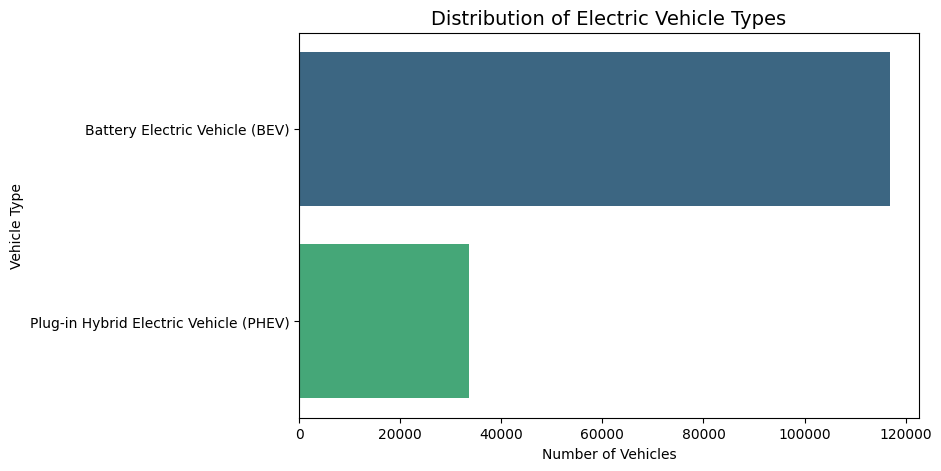

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y="Electric Vehicle Type", hue="Electric Vehicle Type", palette="viridis", order=df["Electric Vehicle Type"].value_counts().index, legend=False)
plt.title("Distribution of Electric Vehicle Types", fontsize=14)
plt.xlabel("Number of Vehicles")
plt.ylabel("Vehicle Type")
plt.show()

- **Distribuția Vehiculelor Electrice pe District Legislativ**: Diagrama de tip countplot ne arată distribuția vehiculelor electrice în funcție de districtul legislativ. Aceasta poate oferi informații valoroase pentru planificarea infrastructurii de încărcare și formularea de politici regionale.


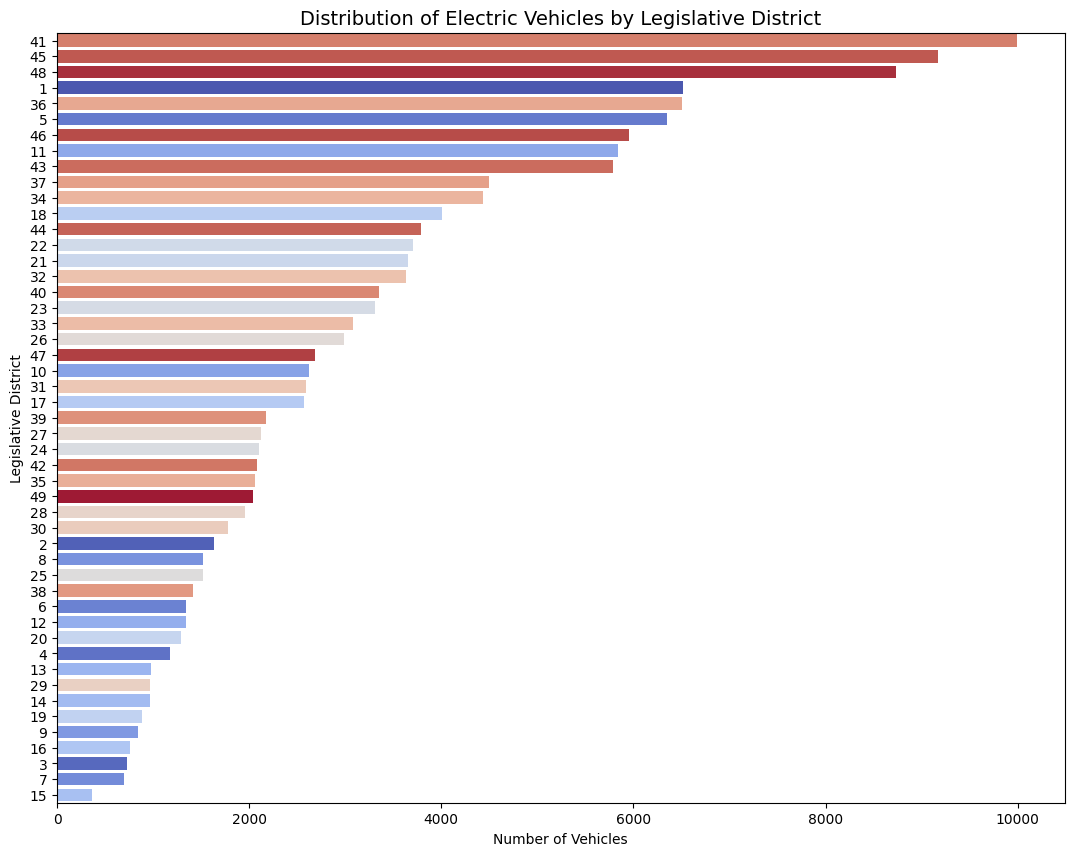

In [18]:
plt.figure(figsize=(13,10))
sns.countplot(data=df, y="Legislative District", hue="Legislative District", palette="coolwarm", order=df["Legislative District"].value_counts().index, legend=False)
plt.title("Distribution of Electric Vehicles by Legislative District", fontsize=14)
plt.xlabel("Number of Vehicles")
plt.ylabel("Legislative District")
plt.show()

- **Tendințele Vehiculelor Electrice de-a Lungul Anilor**: Diagrama de tip histplot ne arată distribuția vehiculelor electrice în funcție de anul modelului. Aceasta ne ajută să observăm tendințele de adopție a vehiculelor electrice de-a lungul timpului și să identificăm perioadele de creștere semnificativă.


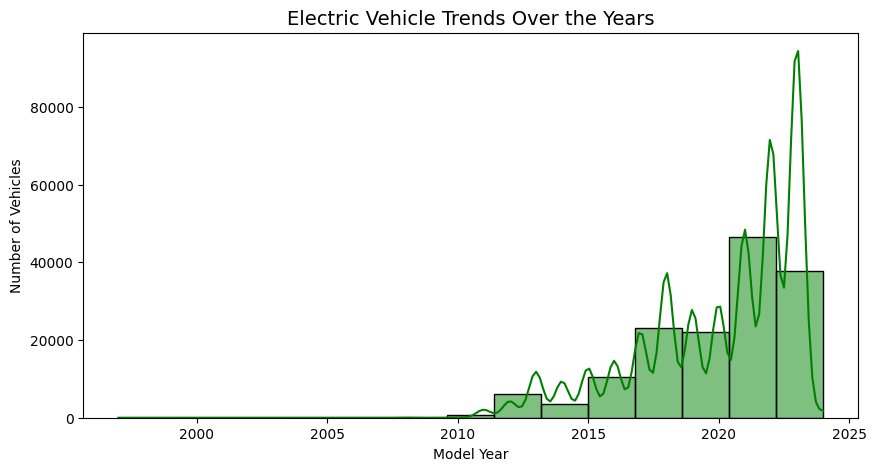

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(df["Model Year"], bins=15, kde=True, color="green")
plt.title("Electric Vehicle Trends Over the Years", fontsize=14)
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.show()

- **Maximul Autonomiei Electrice pe An**: Diagrama de tip lineplot ne arată valoarea maximă a autonomiei electrice pentru fiecare an de model. Aceasta ne ajută să observăm progresul tehnologic în ceea ce privește autonomia vehiculelor electrice de-a lungul timpului.

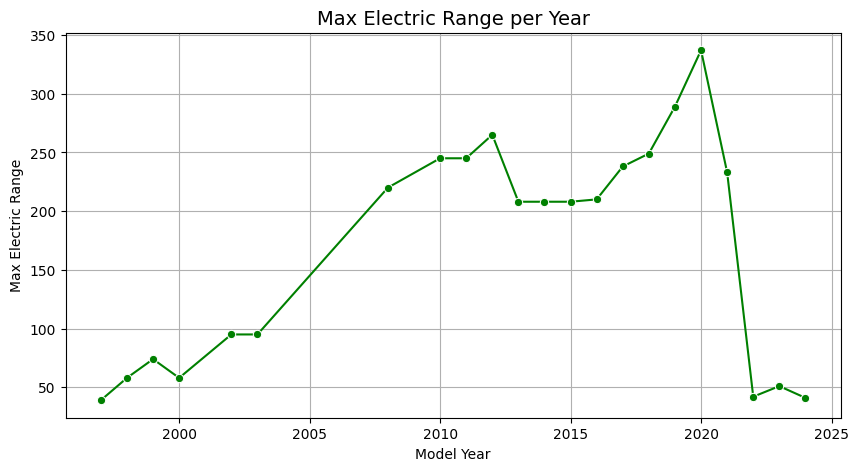

In [20]:
max_range_per_year = df.groupby('Model Year')['Electric Range'].max().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=max_range_per_year, x='Model Year', y='Electric Range', marker='o', color='green')
plt.title('Max Electric Range per Year', fontsize=14)
plt.xlabel('Model Year')
plt.ylabel('Max Electric Range')
plt.grid(True)
plt.show()

-   **Top 15 Modele de Vehicule Electrice**: Diagrama de tip barplot ne arată cele mai populare 15 modele de vehicule electrice din dataset. Aceasta ne ajută să identificăm modelele preferate de utilizatori și să observăm tendințele de popularitate în rândul vehiculelor electrice.

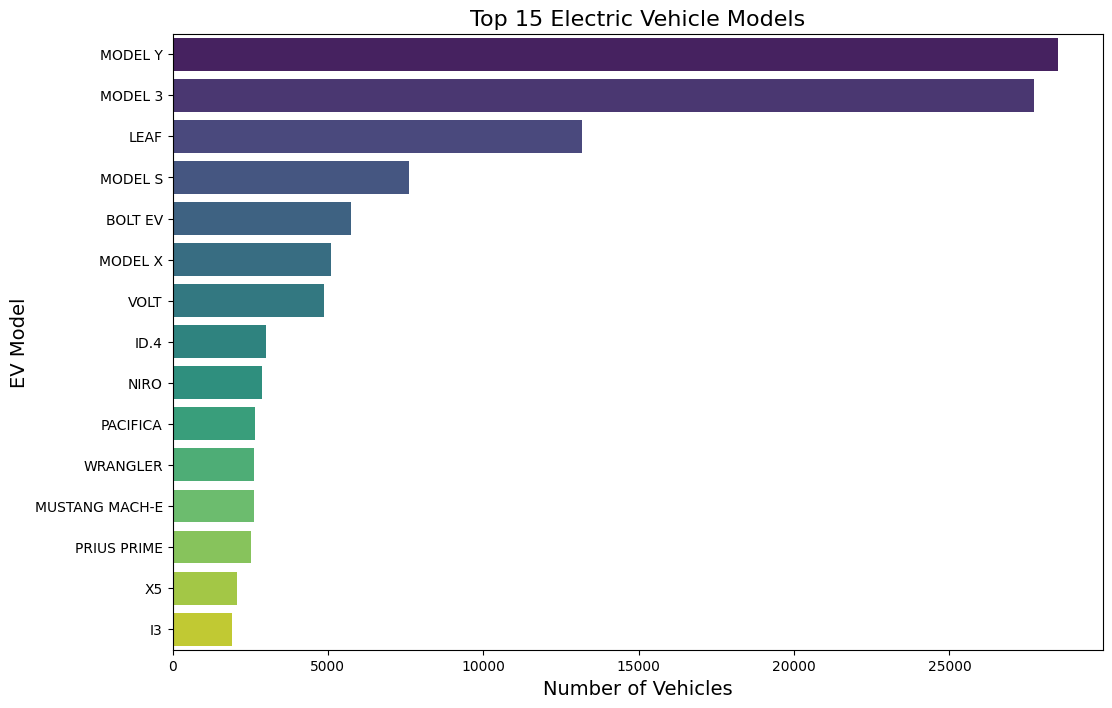

In [21]:
top_15_ev_models = df['Model'].value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_ev_models.values, y=top_15_ev_models.index, hue=top_15_ev_models.index, palette="viridis", dodge=False)
plt.title('Top 15 Electric Vehicle Models', fontsize=16)
plt.xlabel('Number of Vehicles', fontsize=14)
plt.ylabel('EV Model', fontsize=14)
plt.legend([],[], frameon=False) 
plt.show()

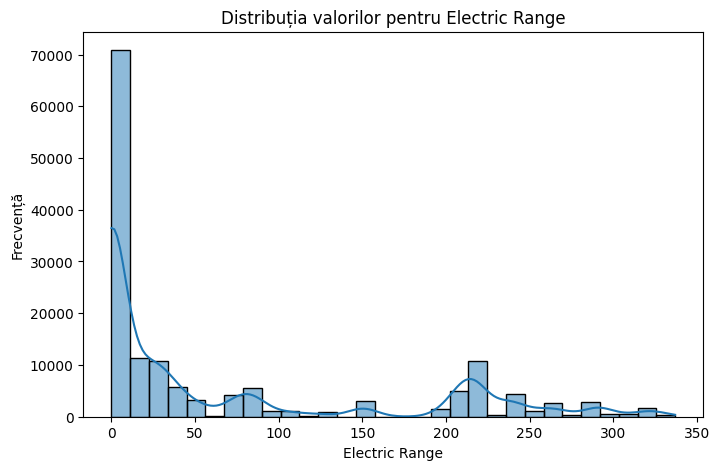

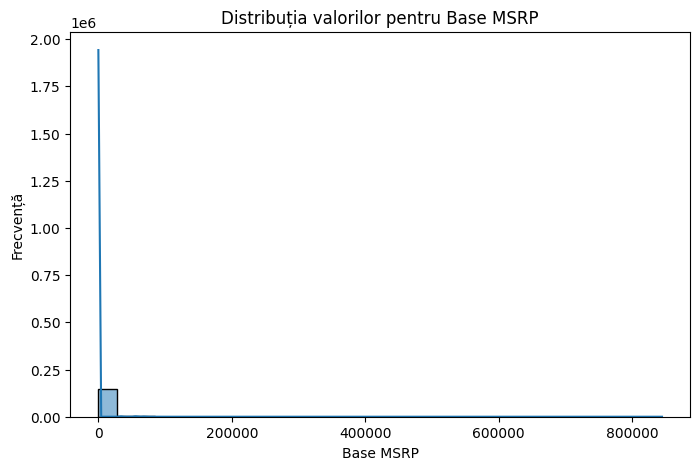

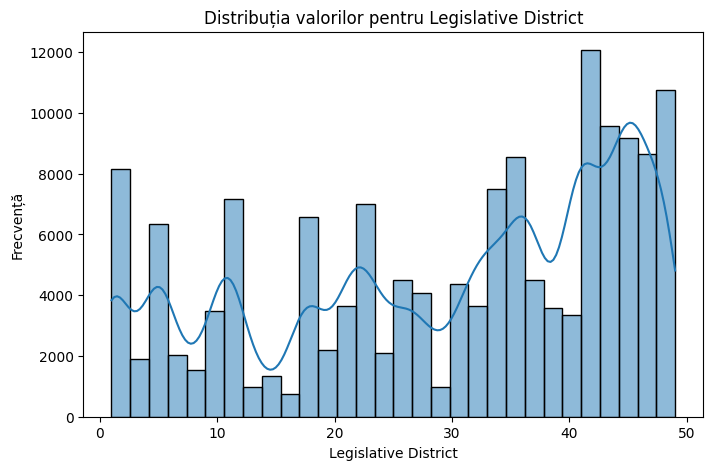

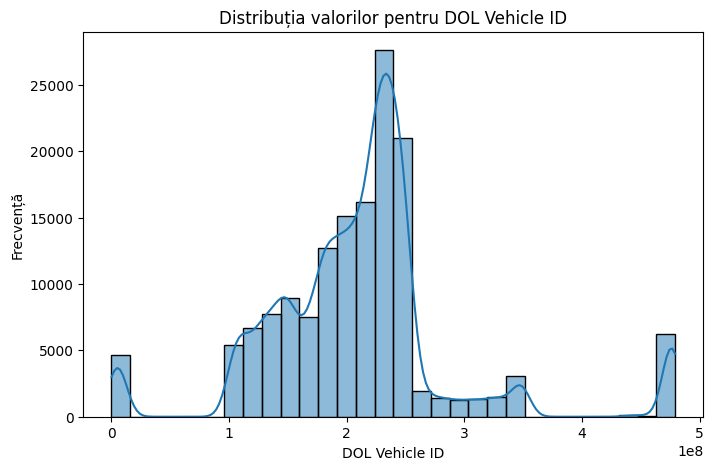

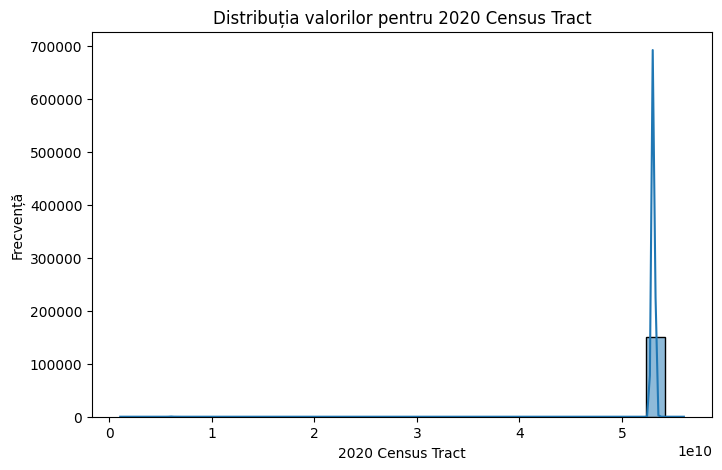

In [22]:
# Generăm histograme suplimentare
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    if col in ['Model Year', 'Postal Code']:
        continue
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribuția valorilor pentru {col}')
    plt.xlabel(col)
    plt.ylabel('Frecvență')
    plt.show()

### Analiza Corelației

Corelația dintre variabilele numerice din dataset oferă informații valoroase despre relațiile dintre acestea. Matricea de corelație evidențiază următoarele aspecte:

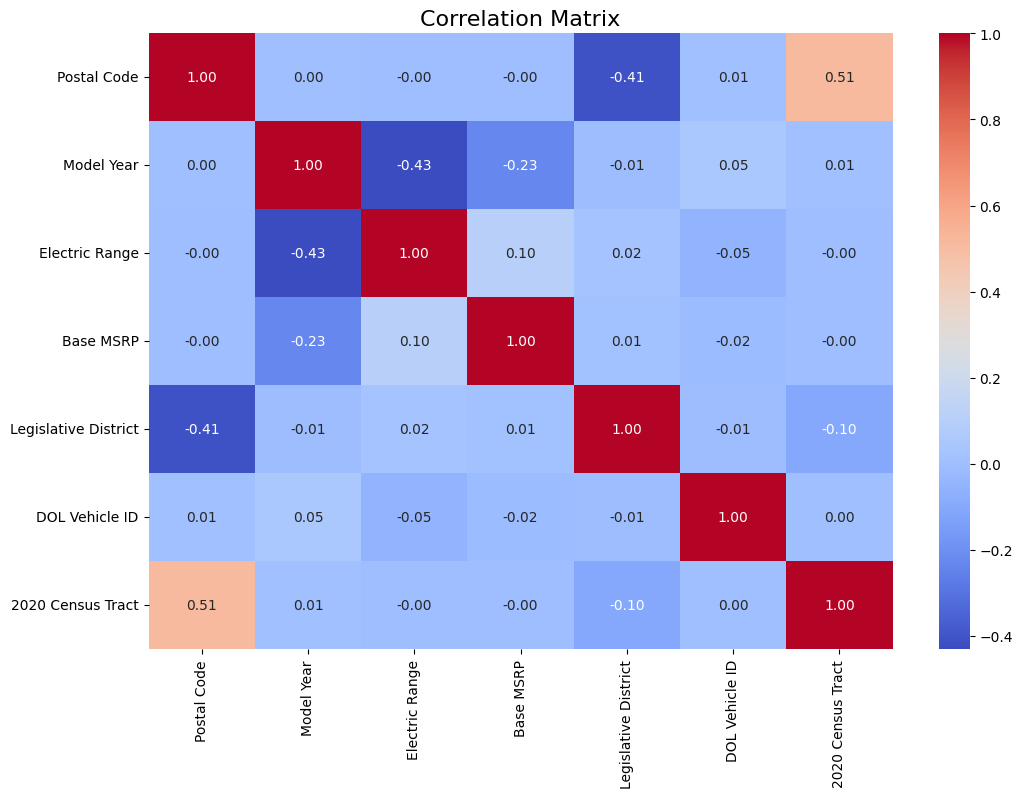

In [ ]:
plt.figure(figsize=(12, 8))

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

### Salvarea Dataset-ului Curat și Completat cu Predicții

După curățarea și completarea dataset-ului cu valorile prezise pentru coloanele lipsă, este important să salvăm acest dataset pentru utilizări ulterioare. Acest pas asigură că toate modificările și completările sunt păstrate și pot fi utilizate în analize viitoare sau în alte proiecte.

Vom salva dataset-ul curat și completat într-un fișier CSV.

In [23]:
df.to_csv('Electric_Vehicle_Population_Data_Cleaned.csv', index=False)